Not setting metadata
60 matching events found
No baseline correction applied
0 projection items activated
Creating RawArray with float64 data, n_channels=31, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     3.998 secs
Ready.
    Using multitaper spectrum estimation with 7 DPSS windows
(15, 31, 191)
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
(15, 31, 159)
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
(15, 31, 109)
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS w

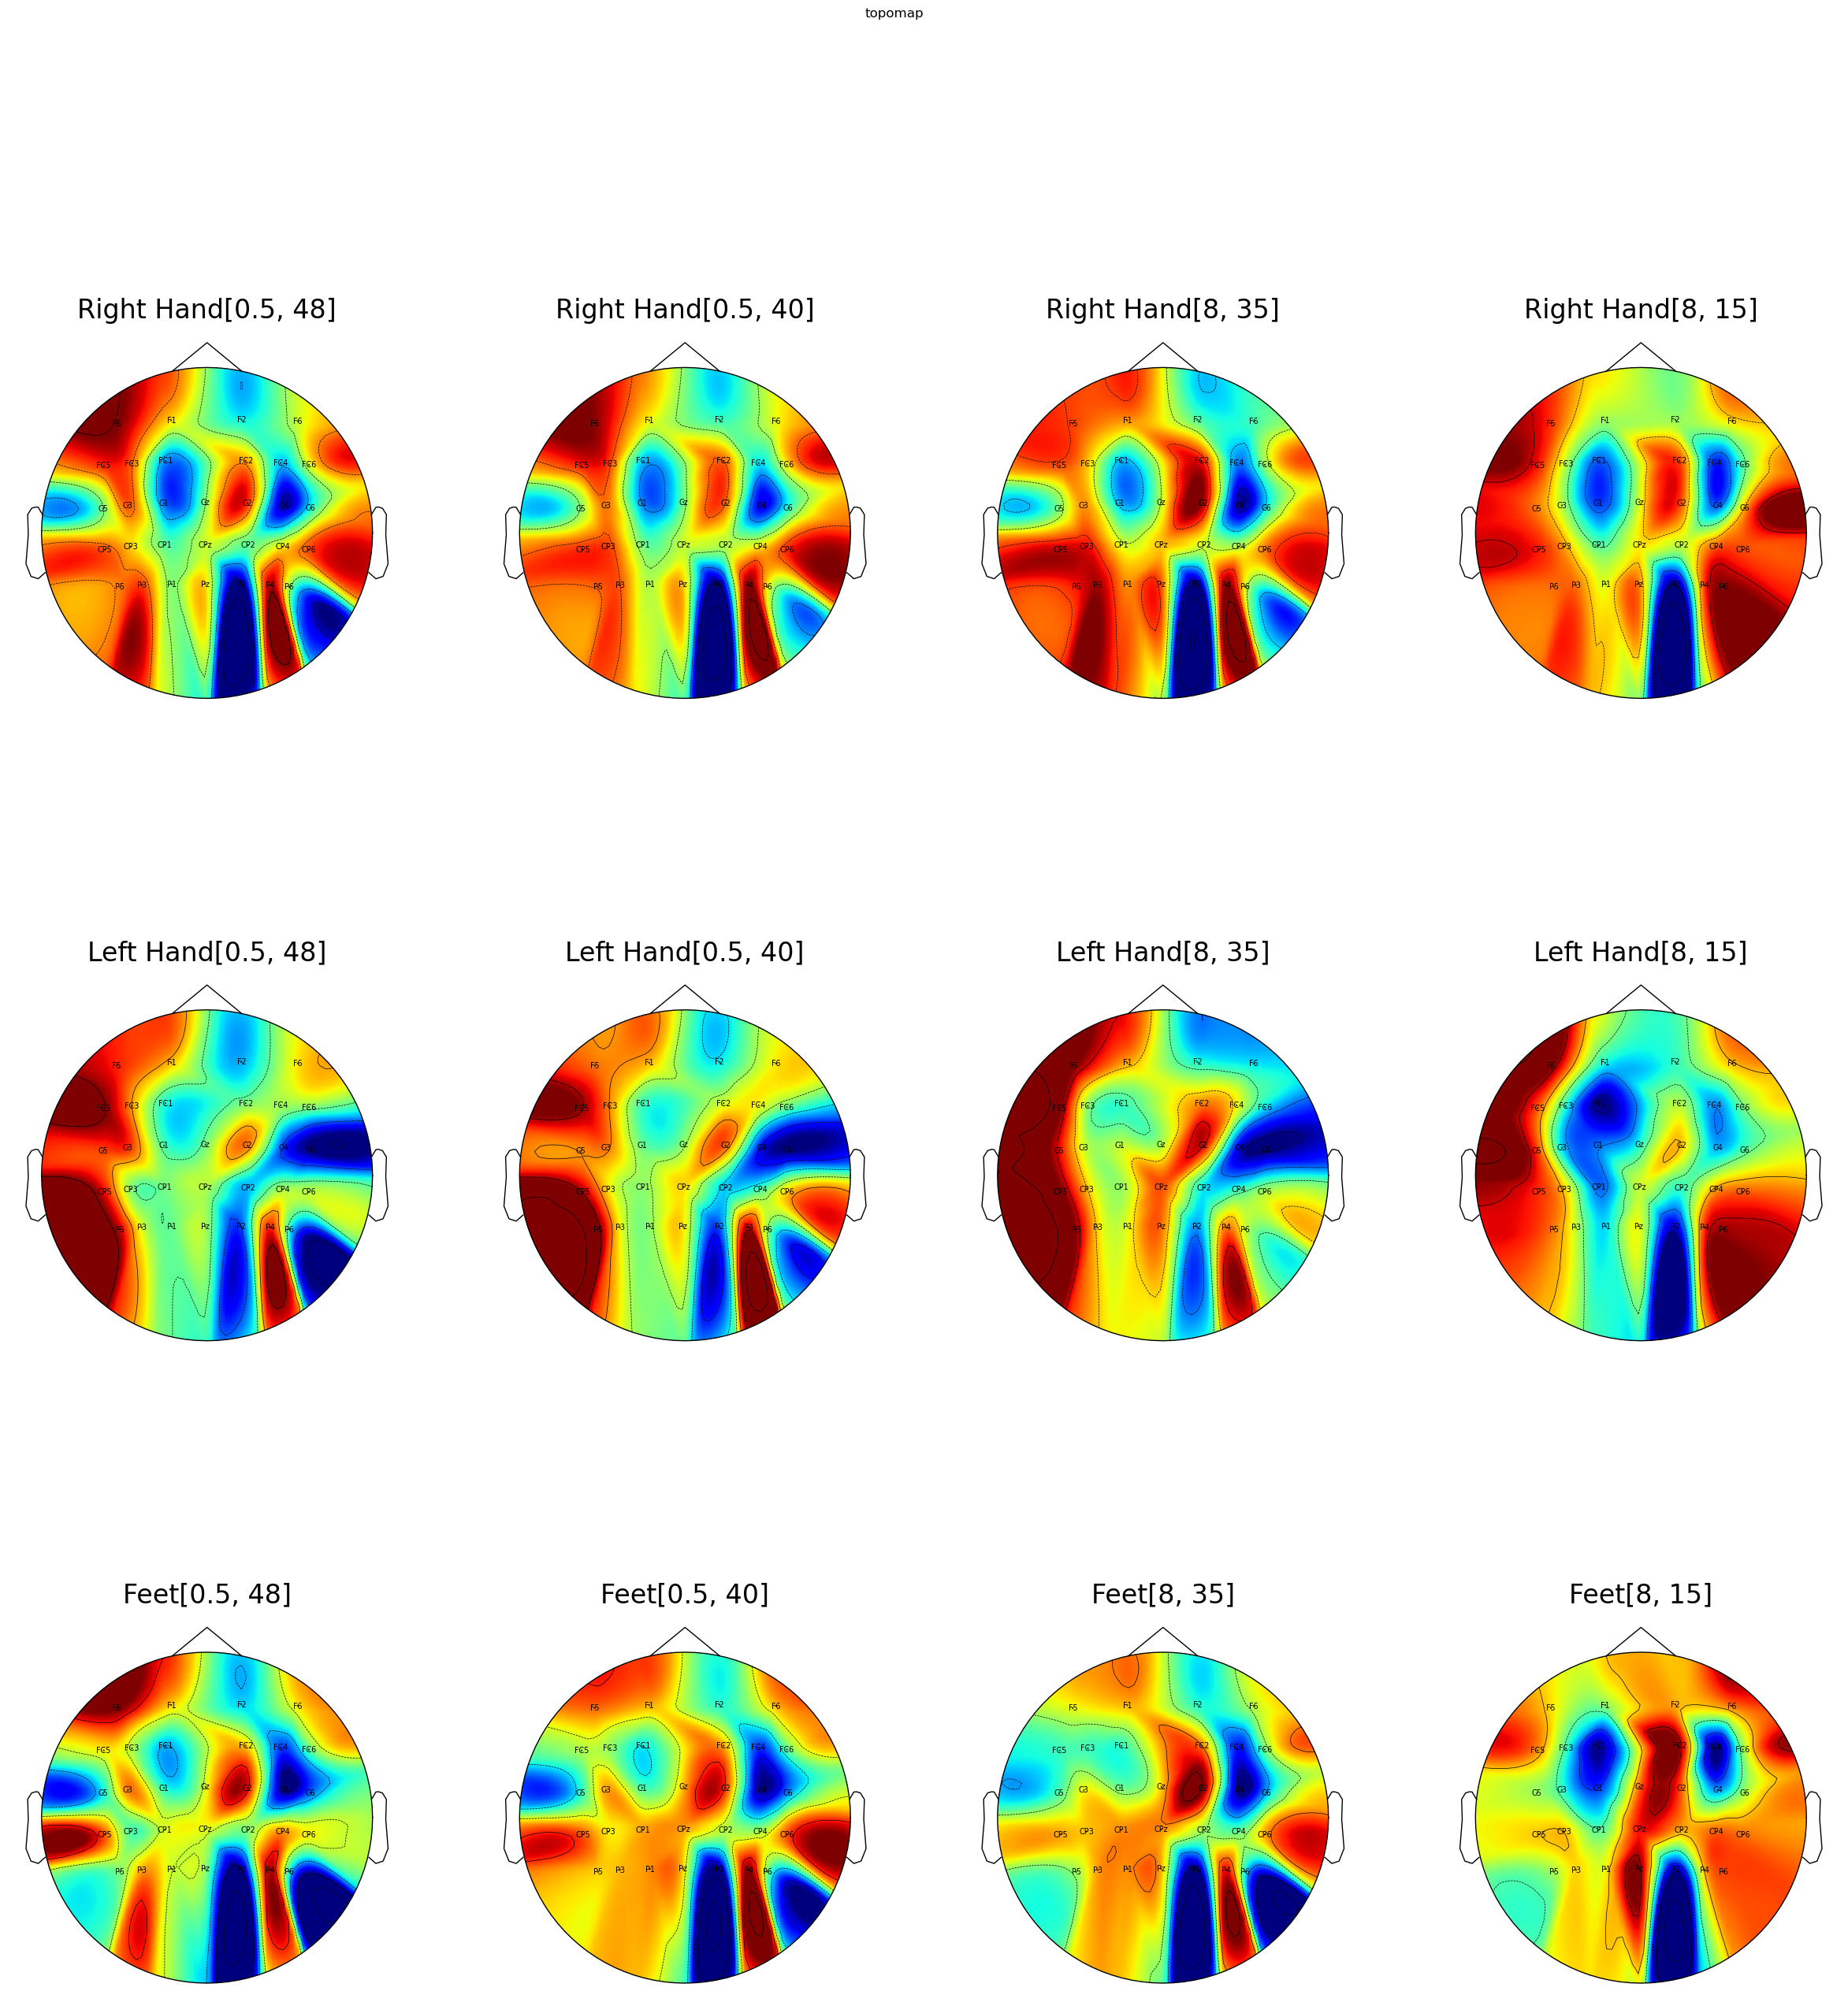

In [4]:
import json
import mne
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA, corrmap, create_ecg_epochs, create_eog_epochs
#from arrowMaker import add_arrows
from epochsMaker import import_EEG, EEG_to_epochs
#from epochToRaw import epoch_to_raw
from rawMaker import EEG_to_raw

file_name = '[CYA]VI_01.txt'
eeg_array, label_array = import_EEG(file_name)
epochs = EEG_to_epochs(eeg_array, label_array)
raw = EEG_to_raw(eeg_array, label_array, 0)

# Updated function to handle Axes object correctly
def epochs_to_relative_psd_topo(epochs, cut_list, file_name='topomap',
                                event_list=['Rest', 'Right Hand'], save_path='topoplot.png'):
    epochs = epochs.set_eeg_reference('average', projection=True, verbose=False)

    fig, ax = plt.subplots(len(event_list)-1, len(cut_list), figsize=(30, 30))
    fig.suptitle("{}".format(file_name, fontsize=16))

    if len(event_list) - 1 == 1:
        ax = [ax]  # Ensure ax is always a 2D array for consistency

    for i, cut_range in enumerate(cut_list):
        lowcut, highcut = cut_range

        # REST (this will be used to subtract other psd)
        epoch_0 = epochs[event_list[0]]
        psd_0, freq_0 = epoch_0.compute_psd(fmin=lowcut, fmax=highcut).get_data(return_freqs=True)
        print(psd_0.shape)
        psd_0 = 10 * np.log10(psd_0)
        psd_0 = np.mean(psd_0, axis=0)  # mean over sample dimension
        psd_0 = np.mean(psd_0, axis=1)  # mean over time dimension

        for j in range(1, len(event_list)):
            epoch_j = epochs[event_list[j]]
            psd_j, freq_j = epoch_j.compute_psd(fmin=lowcut, fmax=highcut).get_data(return_freqs=True)

            psd_j = 10 * np.log10(psd_j)
            psd_j = np.mean(psd_j, axis=0)
            psd_j = np.mean(psd_j, axis=1)

            psd_j -= psd_0

            topo_0 = mne.viz.plot_topomap(psd_j, epoch_j.info, axes=ax[j - 1][i], cmap=plt.cm.jet,
                                          show=False, names=epoch_j.info['ch_names'], vlim=(min(psd_j), max(psd_j)))

            ax[j - 1][i].set_title(event_list[j] + str(cut_range), fontdict={'fontsize': 24, 'fontweight': 'medium'})

    if save_path is not None:
        fig.savefig(save_path)  # save figure, but not working for some reason

    plt.show()




# Plot topomap
# Define the cut_list and event_list
cut_list = [[0.5, 48], [0.5, 40], [8, 35], [8, 15]]
event_list = ['Rest', 'Right Hand', 'Left Hand', 'Feet']

epochs_to_relative_psd_topo(epochs, cut_list, file_name='topomap', event_list=event_list, save_path='topoplot.png')